Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00

<ipython-input-19-3265ea27d1f4>:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


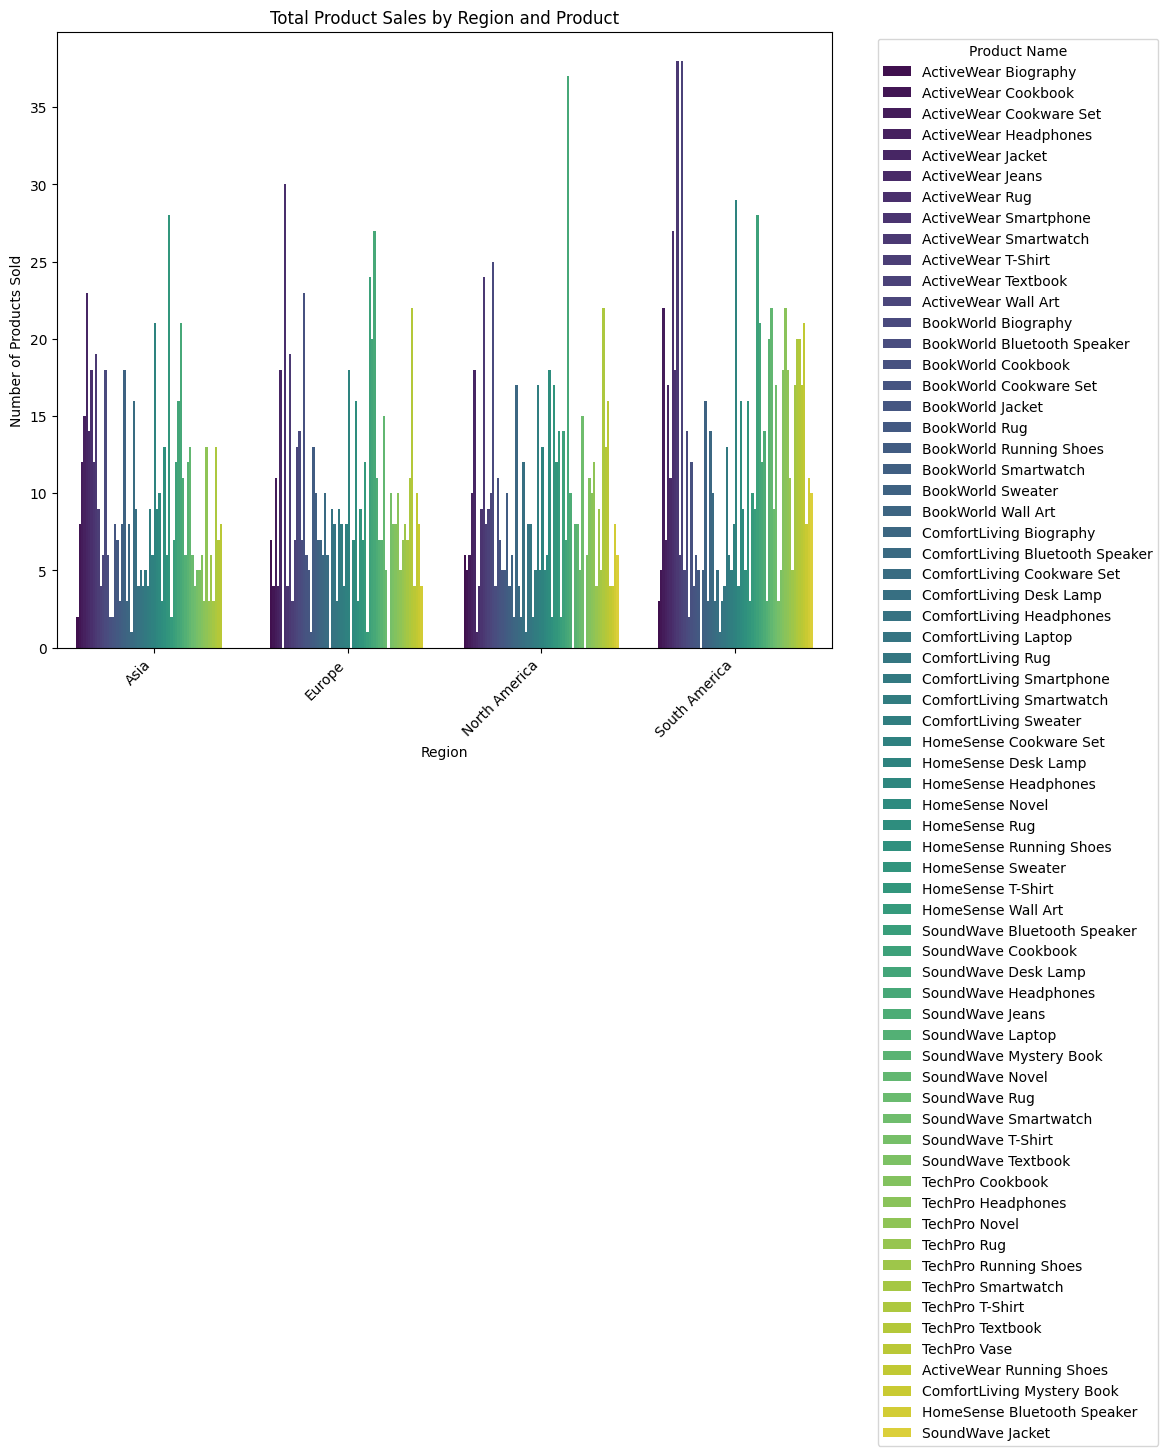

<ipython-input-19-3265ea27d1f4>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


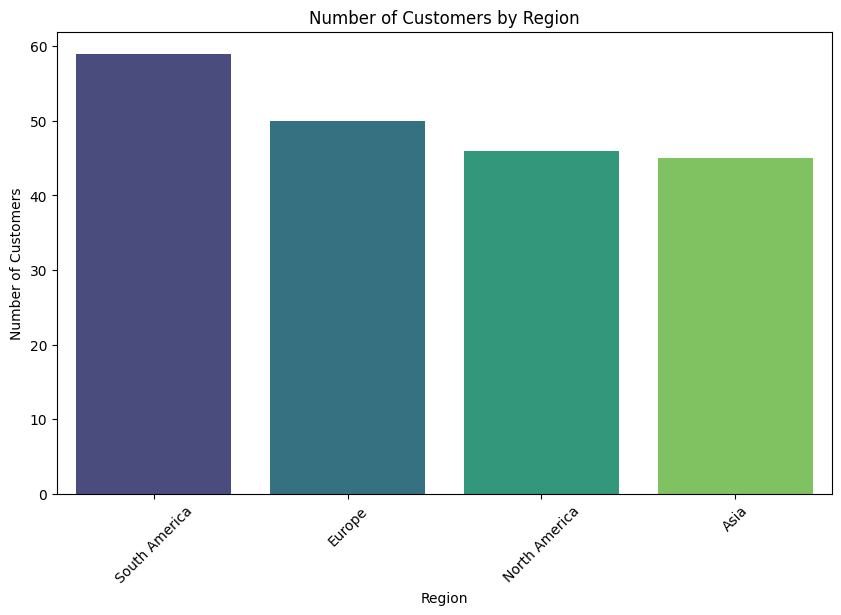

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each DataFrame
print("Customers DataFrame:")
print(customers.head())
print("\nProducts DataFrame:")
print(products.head())
print("\nTransactions DataFrame:")
print(transactions.head())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values
print("\nMissing values in Customers DataFrame:")
print(customers.isnull().sum())
print("\nMissing values in Products DataFrame:")
print(products.isnull().sum())
print("\nMissing values in Transactions DataFrame:")
print(transactions.isnull().sum())

# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display the first few rows of the merged DataFrame
print("\nMerged DataFrame:")
print(data.head())

#Analysis
#1
region_product_sales = data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x='Region', y='Quantity', hue='ProductName', data=region_product_sales, palette='viridis')
plt.title('Total Product Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#2 Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()



<ipython-input-17-97c4f5b87ba2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


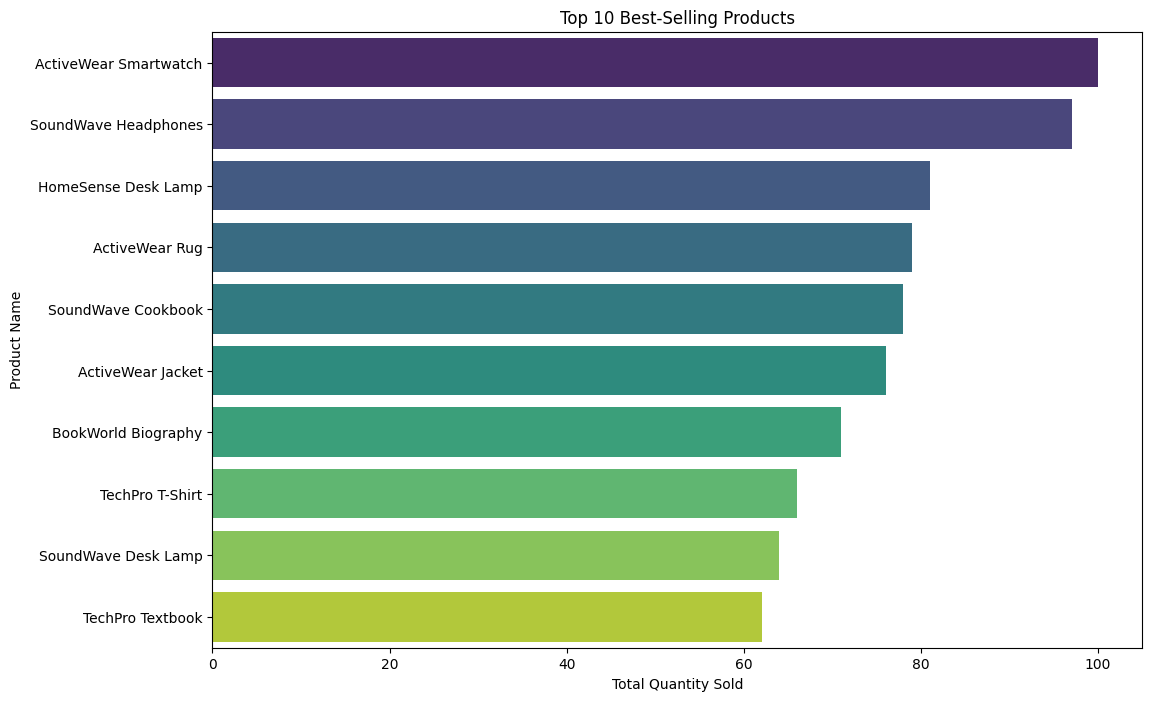

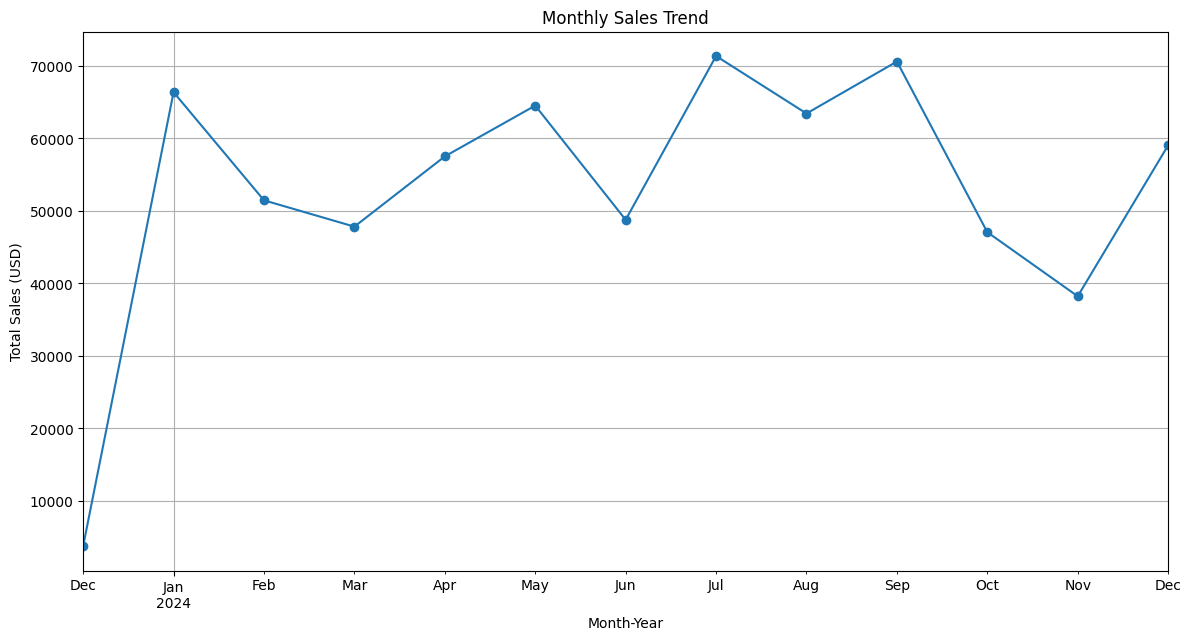

In [17]:
#3 Top-selling products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

#4 Sales trend over time
data['MonthYear'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()


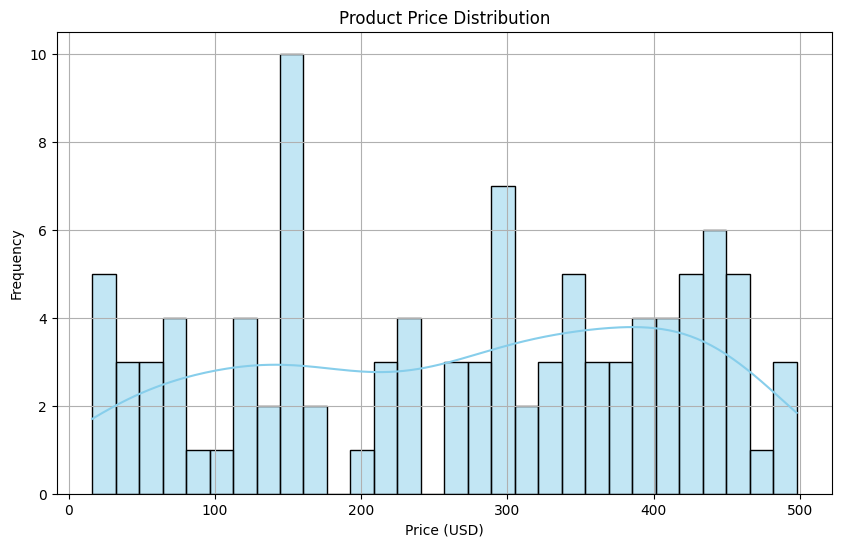

In [3]:
#5 Product price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True, color='skyblue')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


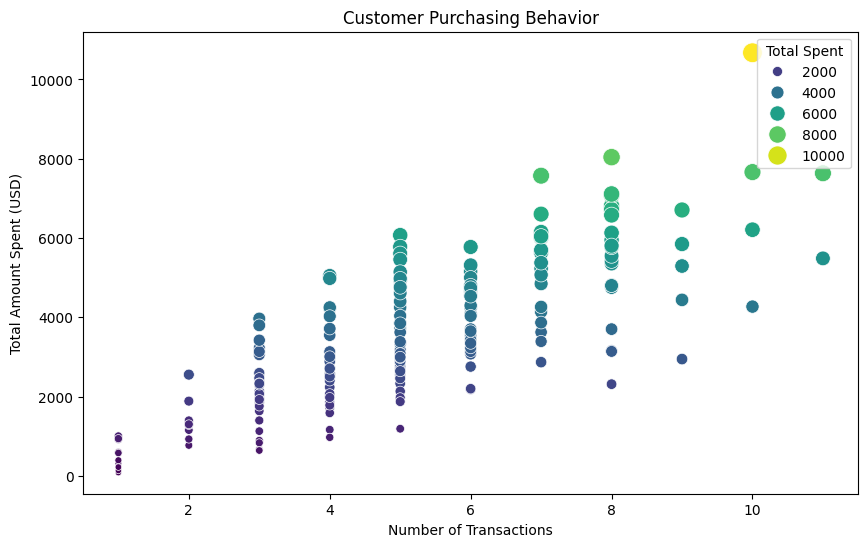

In [4]:
#6 Customer purchasing behavior
customer_behavior = data.groupby('CustomerID').agg({
    'TransactionID': 'nunique',
    'TotalValue': 'sum'
}).rename(columns={'TransactionID': 'TransactionCount', 'TotalValue': 'TotalSpent'})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionCount', y='TotalSpent', data=customer_behavior, hue='TotalSpent', palette='viridis', size='TotalSpent', sizes=(20, 200))
plt.title('Customer Purchasing Behavior')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount Spent (USD)')
plt.legend(title='Total Spent')
plt.show()

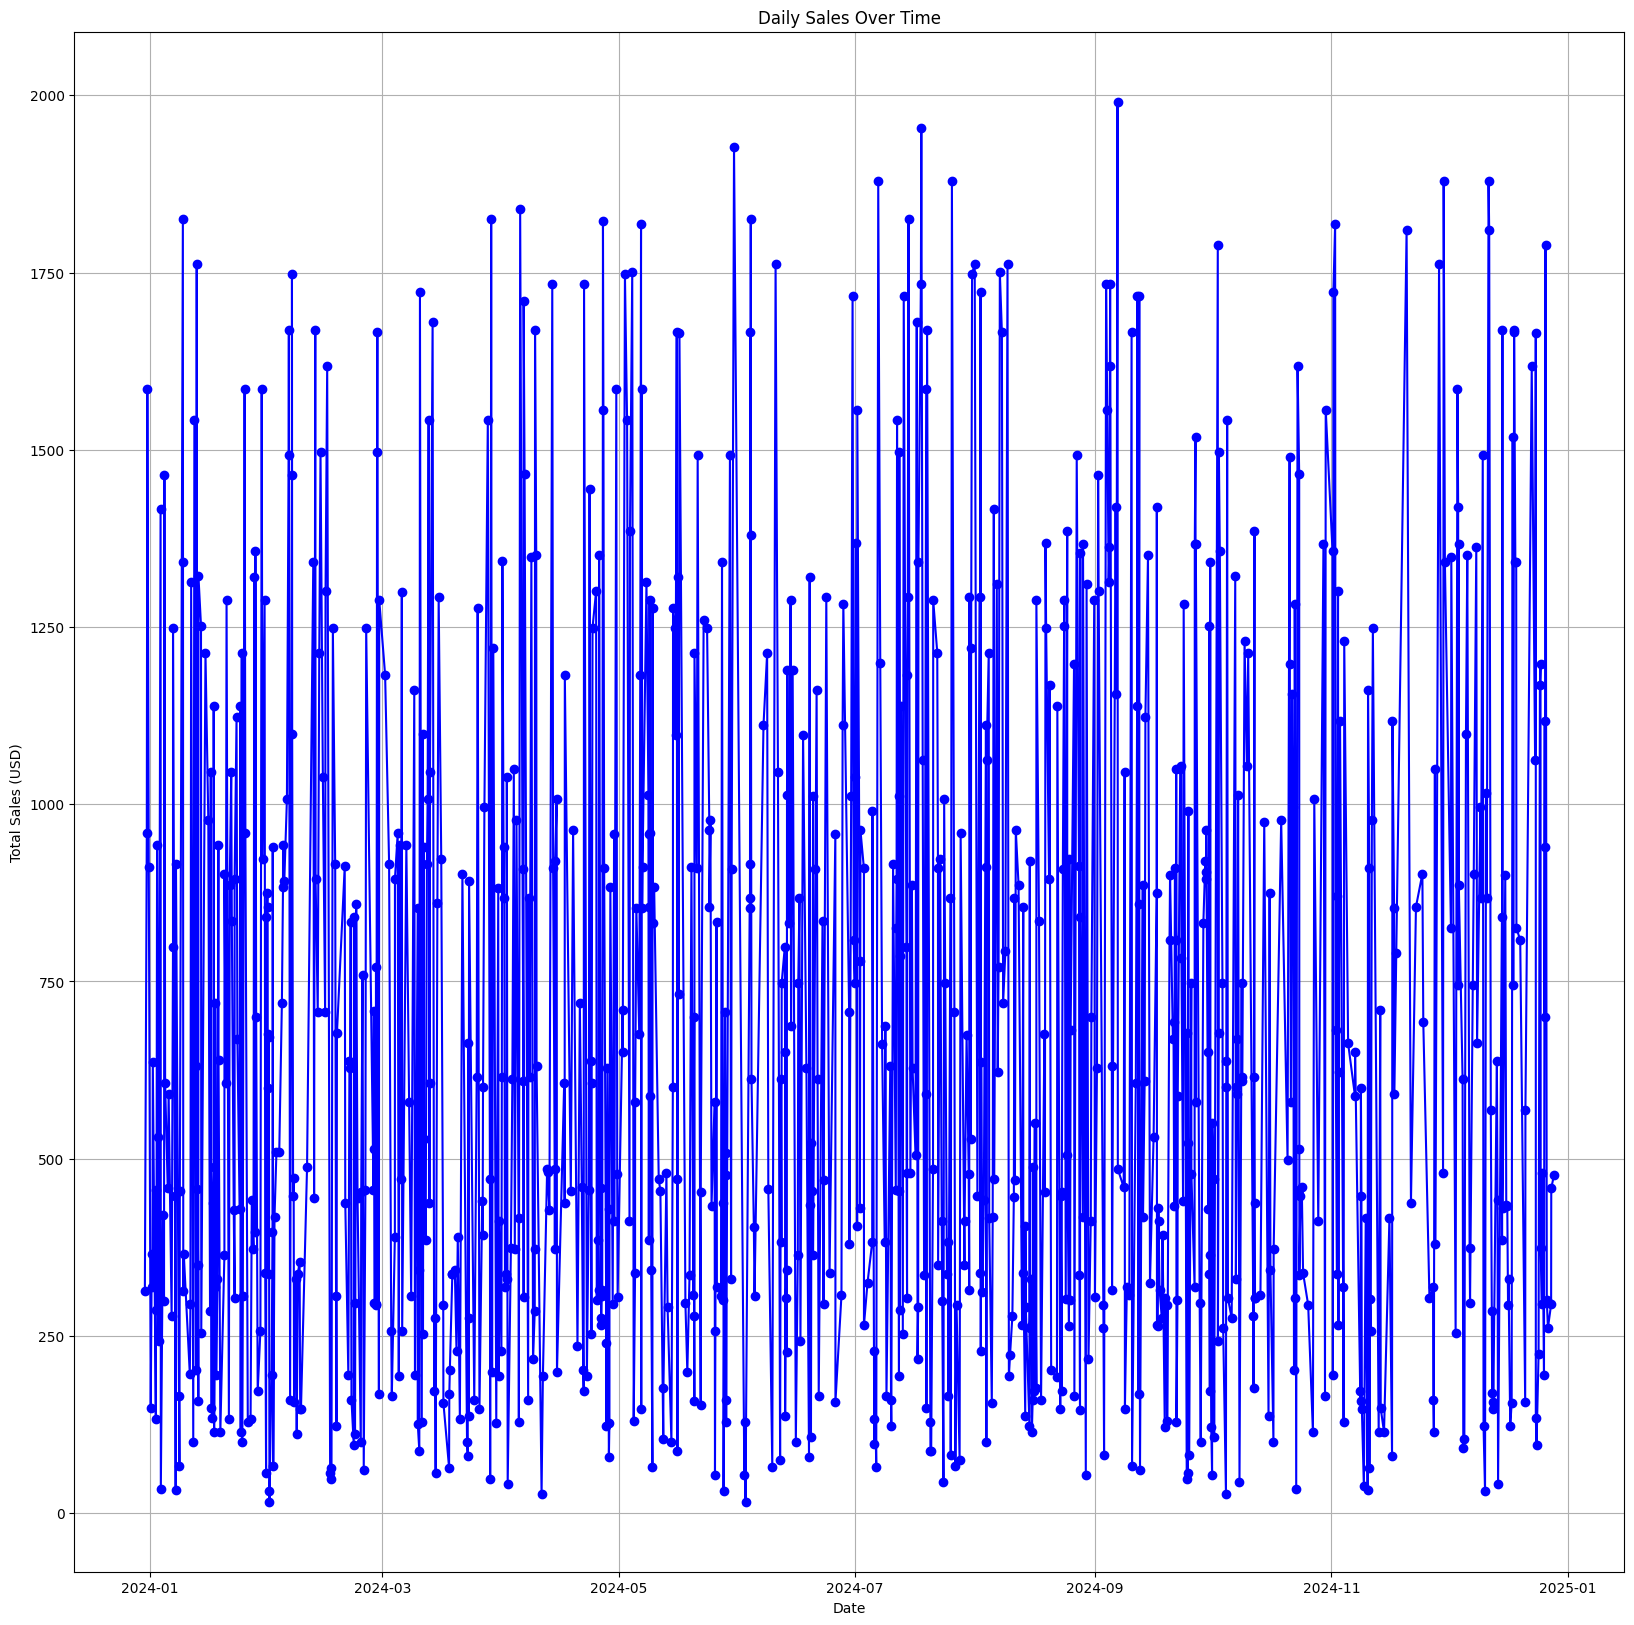

In [8]:
#7
# Plot daily sales over time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

daily_sales = data.groupby('TransactionDate')['TotalValue'].sum().reset_index()

plt.figure(figsize=(20, 20))
plt.plot(daily_sales['TransactionDate'], daily_sales['TotalValue'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()


<ipython-input-9-4ad859a6ba7d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='viridis')


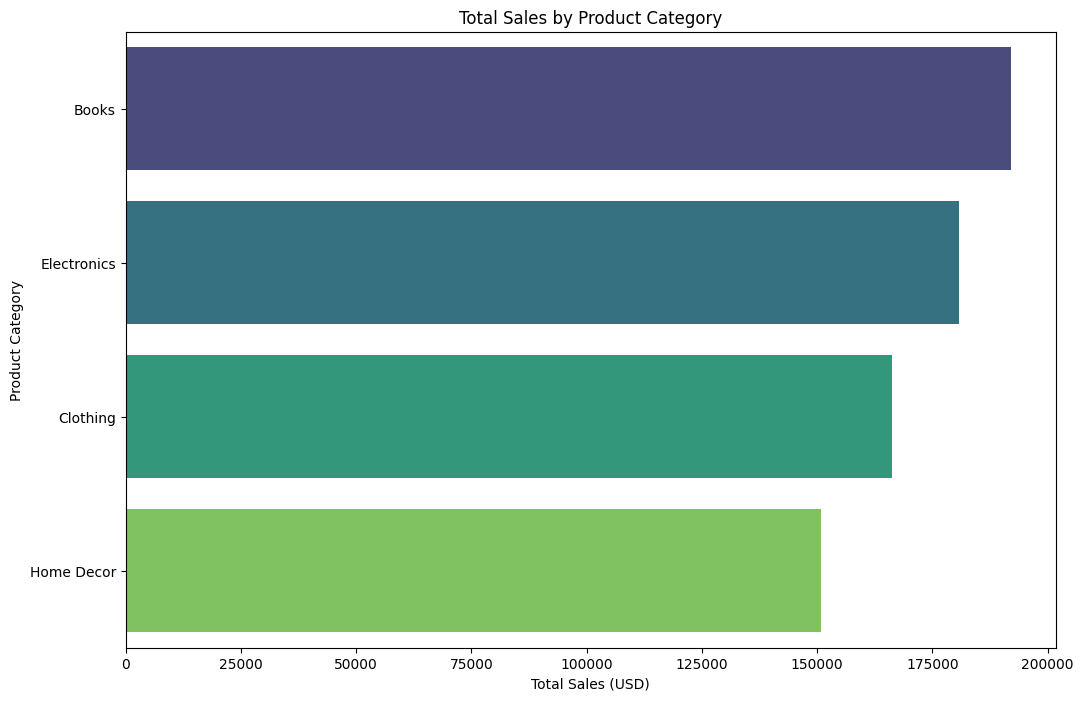

In [9]:
#8
# Plot total sales by product category
import matplotlib.pyplot as plt
import seaborn as sns


data['TotalValue'] = pd.to_numeric(data['TotalValue'], errors='coerce')


category_sales = data.groupby('Category')['TotalValue'].sum().reset_index()


category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Category')
plt.show()
